In [215]:
# -*- coding: utf-8 -*-

import pandas as pd
import re
from nltk import ngrams
from gensim.models import Word2Vec

import sys
reload(sys)
sys.setdefaultencoding("utf-8")

pd.options.display.max_rows = 9999

In [205]:
df = pd.read_csv("./truyen_kieu_data.txt",sep="/", names=["row"], encoding="utf8").dropna()
df.head(10)

row
0                  1..Trăm năm trong cõi người ta,
1           2..Chữ tài chữ mệnh khéo là ghét nhau.
2                     3..Trải qua một cuộc bể dâu,
3        4..Những điều trông thấy mà đau đớn lòng.
4                       5.. Lạ gì bỉ sắc tư phong,
5        6..Trời xanh quen thói má hồng đánh ghen.
6                   7..Cảo thơm lần giở trước đèn,
7         8..Phong tình có lục còn truyền sử xanh.
8                 9,,Rằng năm Gia Tĩnh triều Minh,
9  10.. Bốn phương phẳng lặng, hai kinh vững vàng.

# Xử lý từng dòng thơ

In [206]:
def transform_row(row):
    row = row.encode("utf-8")
    # Xóa số dòng ở đầu câu
    row = re.sub(r"^[0-9\.]+", "", row)
    
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$", "", row)
    
    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, ... trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ")
    
    row = row.strip()
    return row 

df["row"] = df.row.apply(transform_row)
df.head(10)

row
0                    Trăm năm trong cõi người ta
1             Chữ tài chữ mệnh khéo là ghét nhau
2                       Trải qua một cuộc bể dâu
3          Những điều trông thấy mà đau đớn lòng
4                          Lạ gì bỉ sắc tư phong
5          Trời xanh quen thói má hồng đánh ghen
6                     Cảo thơm lần giở trước đèn
7           Phong tình có lục còn truyền sử xanh
8                   Rằng năm Gia Tĩnh triều Minh
9  0   Bốn phương phẳng lặng  hai kinh vững vàng

In [207]:
%%timeit
def kieu_ngram(string, n=1):
    gram_str = list(ngrams(string.split(), n))
    return [ " ".join(gram).lower() for gram in gram_str ]

df["1gram"] = df.row.apply(lambda t: kieu_ngram(t, 1))
df["2gram"] = df.row.apply(lambda t: kieu_ngram(t, 2))


In [208]:
df.head(10)

row  \
0                    Trăm năm trong cõi người ta   
1             Chữ tài chữ mệnh khéo là ghét nhau   
2                       Trải qua một cuộc bể dâu   
3          Những điều trông thấy mà đau đớn lòng   
4                          Lạ gì bỉ sắc tư phong   
5          Trời xanh quen thói má hồng đánh ghen   
6                     Cảo thơm lần giở trước đèn   
7           Phong tình có lục còn truyền sử xanh   
8                   Rằng năm Gia Tĩnh triều Minh   
9  0   Bốn phương phẳng lặng  hai kinh vững vàng   

                                               1gram  \
0                 [trăm, năm, trong, cõi, người, ta]   
1        [chữ, tài, chữ, mệnh, khéo, là, ghét, nhau]   
2                    [trải, qua, một, cuộc, bể, dâu]   
3     [những, điều, trông, thấy, mà, đau, đớn, lòng]   
4                       [lạ, gì, bỉ, sắc, tư, phong]   
5     [trời, xanh, quen, thói, má, hồng, đánh, ghen]   
6                  [cảo, thơm, lần, giở, trước, đèn]   
7      [phong, tình, có, lục, còn, truyền, sử, xanh]   
8                [rằng, năm, gia, tĩnh, triều, minh]   
9  [0, bốn, phương, phẳng, lặng, hai, kinh, vững,...   

                                               2gram  
0  [trăm năm, năm trong, trong cõi, cõi người, ng...  
1  [chữ tài, tài chữ, chữ mệnh, mệnh khéo, khéo l...  
2     [trải qua, qua một, một cuộc, cuộc bể, bể dâu]  
3  [những điều, điều trông, trông thấy, thấy mà, ...  
4           [lạ gì, gì bỉ, bỉ sắc, sắc tư, tư phong]  
5  [trời xanh, xanh quen, quen thói, thói má, má ...  
6  [cảo thơm, thơm lần, lần giở, giở trước, trước...  
7  [phong tình, tình có, có lục, lục còn, còn tru...  
8  [rằng năm, năm gia, gia tĩnh, tĩnh triều, triề...  
9  [0 bốn, bốn phương, phương phẳng, phẳng lặng, ...

In [209]:
df["context"] = df["1gram"] + df["2gram"]
df.head(10)

row  \
0                    Trăm năm trong cõi người ta   
1             Chữ tài chữ mệnh khéo là ghét nhau   
2                       Trải qua một cuộc bể dâu   
3          Những điều trông thấy mà đau đớn lòng   
4                          Lạ gì bỉ sắc tư phong   
5          Trời xanh quen thói má hồng đánh ghen   
6                     Cảo thơm lần giở trước đèn   
7           Phong tình có lục còn truyền sử xanh   
8                   Rằng năm Gia Tĩnh triều Minh   
9  0   Bốn phương phẳng lặng  hai kinh vững vàng   

                                               1gram  \
0                 [trăm, năm, trong, cõi, người, ta]   
1        [chữ, tài, chữ, mệnh, khéo, là, ghét, nhau]   
2                    [trải, qua, một, cuộc, bể, dâu]   
3     [những, điều, trông, thấy, mà, đau, đớn, lòng]   
4                       [lạ, gì, bỉ, sắc, tư, phong]   
5     [trời, xanh, quen, thói, má, hồng, đánh, ghen]   
6                  [cảo, thơm, lần, giở, trước, đèn]   
7      [phong, tình, có, lục, còn, truyền, sử, xanh]   
8                [rằng, năm, gia, tĩnh, triều, minh]   
9  [0, bốn, phương, phẳng, lặng, hai, kinh, vững,...   

                                               2gram  \
0  [trăm năm, năm trong, trong cõi, cõi người, ng...   
1  [chữ tài, tài chữ, chữ mệnh, mệnh khéo, khéo l...   
2     [trải qua, qua một, một cuộc, cuộc bể, bể dâu]   
3  [những điều, điều trông, trông thấy, thấy mà, ...   
4           [lạ gì, gì bỉ, bỉ sắc, sắc tư, tư phong]   
5  [trời xanh, xanh quen, quen thói, thói má, má ...   
6  [cảo thơm, thơm lần, lần giở, giở trước, trước...   
7  [phong tình, tình có, có lục, lục còn, còn tru...   
8  [rằng năm, năm gia, gia tĩnh, tĩnh triều, triề...   
9  [0 bốn, bốn phương, phương phẳng, phẳng lặng, ...   

                                             context  
0  [trăm, năm, trong, cõi, người, ta, trăm năm, n...  
1  [chữ, tài, chữ, mệnh, khéo, là, ghét, nhau, ch...  
2  [trải, qua, một, cuộc, bể, dâu, trải qua, qua ...  
3  [những, điều, trông, thấy, mà, đau, đớn, lòng,...  
4  [lạ, gì, bỉ, sắc, tư, phong, lạ gì, gì bỉ, bỉ ...  
5  [trời, xanh, quen, thói, má, hồng, đánh, ghen,...  
6  [cảo, thơm, lần, giở, trước, đèn, cảo thơm, th...  
7  [phong, tình, có, lục, còn, truyền, sử, xanh, ...  
8  [rằng, năm, gia, tĩnh, triều, minh, rằng năm, ...  
9  [0, bốn, phương, phẳng, lặng, hai, kinh, vững,...

In [210]:
train_data = df.context.tolist()
len(train_data)

3258

In [225]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)    
model = Word2Vec(train_data, size=100, window=5, min_count=3, workers=4, sg=1)

In [226]:
model.wv.vocab

{'t\xe1\xba\xa1': <gensim.models.word2vec.Vocab at 0x7efb966521d0>,
 'd\xc3\xa0nh': <gensim.models.word2vec.Vocab at 0x7efb971e2950>,
 'l\xe1\xbb\x9di s\xe1\xba\xaft': <gensim.models.word2vec.Vocab at 0x7efb971c1f90>,
 'nh\xe1\xbb\x8f to': <gensim.models.word2vec.Vocab at 0x7efb96652210>,
 't\xe1\xbb\xab c\xc3\xb4ng': <gensim.models.word2vec.Vocab at 0x7efb971cc150>,
 'y\xe1\xba\xbfm': <gensim.models.word2vec.Vocab at 0x7efbb55e33d0>,
 'y\xe1\xba\xbfn': <gensim.models.word2vec.Vocab at 0x7efbb59d5fd0>,
 't\xe1\xba\xbb': <gensim.models.word2vec.Vocab at 0x7efb9720f750>,
 't\xc3\xacnh cho': <gensim.models.word2vec.Vocab at 0x7efb97215b50>,
 'ng\xe1\xbb\x95n ngang': <gensim.models.word2vec.Vocab at 0x7efb9720f450>,
 't\xc3\xacnh chi': <gensim.models.word2vec.Vocab at 0x7efb9720f490>,
 'c\xc3\xbai': <gensim.models.word2vec.Vocab at 0x7efb9720f4d0>,
 '\xc4\x91o\xe1\xba\xa1n tr\xc6\xb0\xe1\xbb\x9dng': <gensim.models.word2vec.Vocab at 0x7efb971ed750>,
 'g\xe1\xba\xa1t': <gensim.models.word2ve

In [233]:
model.wv.similar_by_word("thúy kiều")

[('nghe l\xe1\xbb\x9di', 0.9986133575439453),
 ('th\xc3\xa2m', 0.9985884428024292),
 ('tr\xc3\xb4ng', 0.998569130897522),
 ('n\xe1\xbb\xafa', 0.9985570907592773),
 ('l\xe1\xba\xbd', 0.9985322952270508),
 ('b\xe1\xba\xaft', 0.9985289573669434),
 ('v\xc3\xac', 0.9985174536705017),
 ('v\xe1\xba\xbb', 0.9985098838806152),
 ('ng\xe1\xbb\x8dn', 0.998508095741272),
 ('s\xe1\xba\xafc', 0.9985053539276123)]

In [243]:
print """
[('th\xc3\xa2m', 0.9992734789848328),
 ('b\xe1\xbb\xa5i', 0.9992575645446777),
 ('l\xe1\xba\xbd', 0.9992456436157227),
 ('b\xe1\xba\xaft', 0.9992380142211914),
 ('v\xc3\xad', 0.9992336630821228),
 ('v\xe1\xba\xbb', 0.9992306232452393),
 ('s\xe1\xba\xafc', 0.999223530292511),
 ('dao', 0.9992178678512573),
 ('phen', 0.9992178082466125),
 ('h\xc6\xa1n', 0.999215841293335)]
"""

# PCA và plot 2d

In [228]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words_np = []
words_label = []
for word in model.wv.vocab.keys():
    words_np.append(model.wv[word])
    words_label.append(word)

pca = PCA(n_components=2)
pca.fit(words_np)
reduced = pca.transform(words_np)

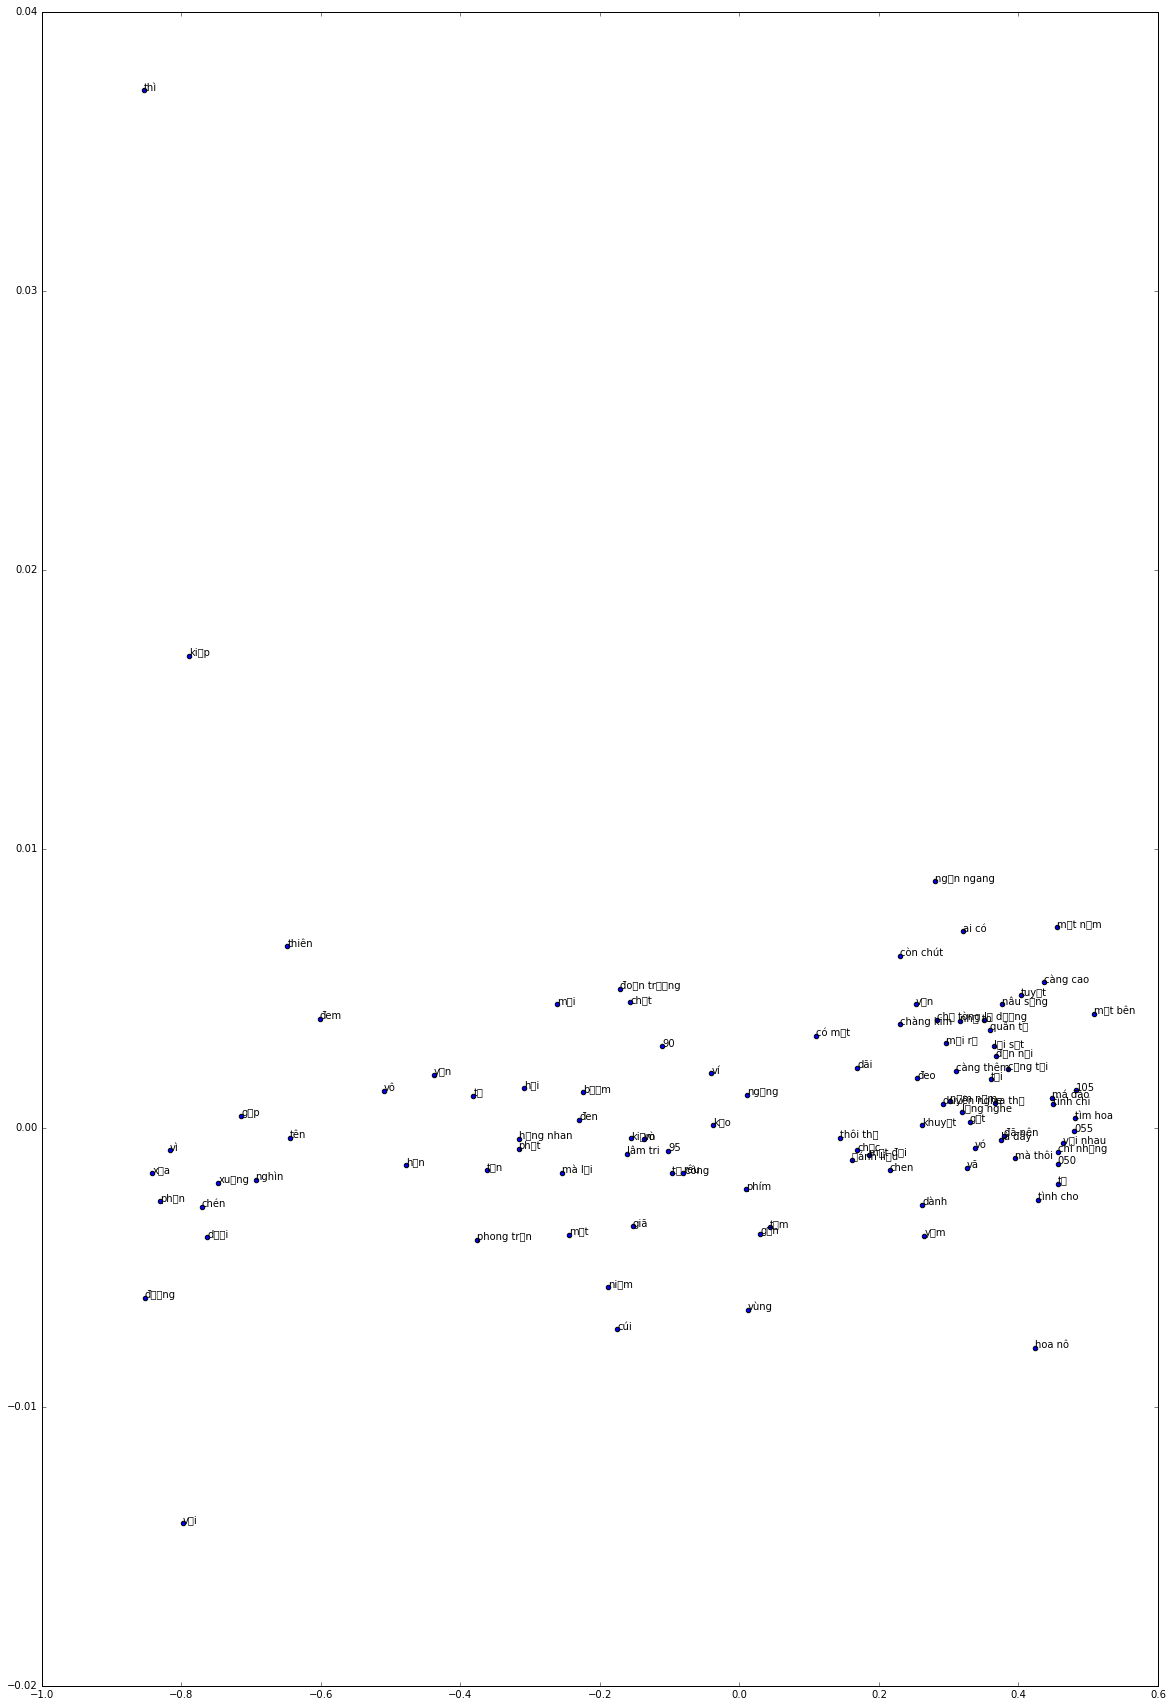

In [229]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,30)
for index,vec in enumerate(reduced):
    if index <100:
        x,y=vec[0],vec[1]
        plt.scatter(x,y)
        plt.annotate(words_label[index],xy=(x,y))
plt.show()

# Save model

In [244]:
model.wv.save("kieu_word2vec.model")